In [4]:
import graphlab


SyntaxError: invalid syntax (<ipython-input-4-063b9ac1f28e>, line 2)

In [3]:
sales = graphlab.SFrame('kc_house_data.gl/')
import numpy as np

In [4]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe['price']   
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)


In [5]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)


In [6]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if (feature_is_constant == True):
        derivative = 2 * np.dot(errors, feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2 * (np.dot(errors, feature) + l2_penalty * weight)
    return derivative

In [7]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-5.65541667824e+13
-5.65541667824e+13

-22446749336.0
-22446749336.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

In [3]:
sales = pd.read_csv('kc_house_data.csv')

In [4]:
x = sales.drop(['id','date','price'] , axis =1)
y = sales['price']

In [5]:
x_train ,x_test ,y_train ,y_test =train_test_split(x ,y ,test_size =0.2 ,random_state =40)

In [6]:
model = LinearRegression()
model.fit(x_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
y_pred = model.predict(x_train)

In [8]:
r2_score(y_train,y_pred)

0.6998007640242365

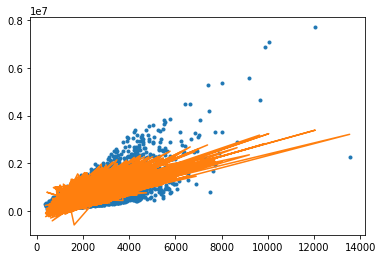

In [9]:
plt.plot(x_train['sqft_living'] ,y_train , '.' )
plt.plot(x_train['sqft_living'] , y_pred)

In [10]:
def normalization(X_train, X_test):
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(X_train) 
    #mean = scaler.mean_
    #std = scaler.var_
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    return X_train_std, X_test_std, scaler


In [ ]:
#splits dataset in to test and train sets

def test_train_split(X,y,split=0.33):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split)
    return X_train,X_test,y_train,y_test

In [16]:
from sklearn.linear_model import Ridge ,LassoCV
alphas =np.logspace(-4,4,5)
model_Lasso = LassoCV(alphas = alphas ,max_iter = 1000)
model_Ridge = Ridge(alpha = 0.1)

In [17]:
model_Lasso.fit(x_train,y_train)


C:\Users\SRI\AppData\Local\conda\conda\envs\SRI-ENVS\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\SRI\AppData\Local\conda\conda\envs\SRI-ENVS\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SRI\AppData\Local\conda\conda\envs\SRI-ENVS\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\SRI\AppData\Local\conda\conda\envs\SRI-ENVS\lib\site-packages\sklearn\li

LassoCV(alphas=array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]), copy_X=True,
    cv='warn', eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [18]:
y1=model_Lasso.predict(x_train)

In [19]:
r2_score(y_train ,y1)

0.6998007617970758

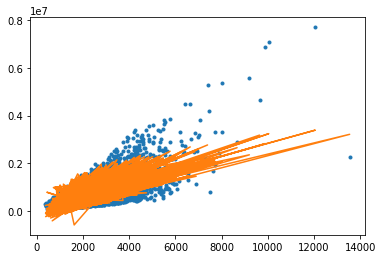

In [20]:
plt.plot(x_train['sqft_living'] ,y_train , '.' )
plt.plot(x_train['sqft_living'] , y1)